In [2]:
import numpy as np 
import pandas as pd 
import random
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error

from matplotlib import style
style.use('seaborn-white')

import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning) 

In [3]:
# Loading simulated results for comparsion with SINDy
df_IDM = pd.read_csv('myResults/NAPOLI2/Exp/Model_1/VehicleID_1/simData/Simulation_CalExp_1_ValExp_1_RMSE(A).csv', header=None,low_memory=False, encoding='UTF-8')
df_IDM = df_IDM.rename(columns={0:"FOLLOW_VEL",1:"FOLLOW_PRED_V",2:"SPACING_REAL",3:"SPACING_PRED",4:"FOLLOW_ACC",5:"FOLLOW_PRED_A"})
df_IDM = pd.DataFrame(df_IDM)

df_GIPPS = pd.read_csv('myResults/NAPOLI2/Exp/Model_2/VehicleID_1/simData/Simulation_CalExp_1_ValExp_1_RMSE(A).csv', header=None,low_memory=False, encoding='UTF-8')
df_GIPPS = df_GIPPS.rename(columns={0:"FOLLOW_VEL",1:"FOLLOW_PRED_V",2:"SPACING_REAL",3:"SPACING_PRED",4:"FOLLOW_ACC",5:"FOLLOW_PRED_A"})
df_GIPPS = pd.DataFrame(df_GIPPS)

df_FVDM_CTH = pd.read_csv('myResults/NAPOLI2/Exp/Model_3/VehicleID_1/simData/Simulation_CalExp_1_ValExp_1_RMSE(A).csv', header=None,low_memory=False, encoding='UTF-8')
df_FVDM_CTH = df_FVDM_CTH.rename(columns={0:"FOLLOW_VEL",1:"FOLLOW_PRED_V",2:"SPACING_REAL",3:"SPACING_PRED",4:"FOLLOW_ACC",5:"FOLLOW_PRED_A"})
df_FVDM_CTH = pd.DataFrame(df_FVDM_CTH)

df_FVDM_SIG = pd.read_csv('myResults/NAPOLI2/Exp/Model_4/VehicleID_1/simData/Simulation_CalExp_1_ValExp_1_RMSE(A).csv', header=None,low_memory=False, encoding='UTF-8')
df_FVDM_SIG = df_FVDM_SIG.rename(columns={0:"FOLLOW_VEL",1:"FOLLOW_PRED_V",2:"SPACING_REAL",3:"SPACING_PRED",4:"FOLLOW_ACC",5:"FOLLOW_PRED_A"})
df_FVDM_SIG = pd.DataFrame(df_FVDM_SIG)

In [4]:
df = pd.read_csv('Data/NAPOLI/dataVehicle1.csv', header=None,low_memory=False, encoding='UTF-8')
df = df.rename(columns={0:"TIME",1:"LEAD_POS",2:"FOLLOW_POS",3:"LEAD_VEL",4:"FOLLOW_VEL",5:"LEAD_LENGTH"})
df = pd.DataFrame(df)
print(df)

      TIME    LEAD_POS  FOLLOW_POS  LEAD_VEL  FOLLOW_VEL  LEAD_LENGTH
0        1     9.45102     2.38000   4.39751     4.21765         3.73
1        2     9.89652     2.80989   4.51239     4.38015         3.73
2        3    10.35270     3.25411   4.61132     4.50423         3.73
3        4    10.81753     3.70859   4.68523     4.58534         3.73
4        5    11.28818     4.16912   4.72783     4.62536         3.73
...    ...         ...         ...       ...         ...          ...
1884  1885  1370.01124  1351.63571  14.01855    14.21913         3.73
1885  1886  1371.41119  1353.05787  13.98043    14.22416         3.73
1886  1887  1372.80736  1354.48035  13.94293    14.22541         3.73
1887  1888  1374.19992  1355.90270  13.90839    14.22166         3.73
1888  1889  1375.58930  1357.32449  13.87907    14.21401         3.73

[1889 rows x 6 columns]


In [5]:
# Converting Simulated Dataframes to NumPy Arrays 
followRealV_IDM = np.asarray(df_IDM['FOLLOW_VEL']) # Follow Real Velocity  
followPredV_IDM = np.asarray(df_IDM['FOLLOW_PRED_V']) # Follow Pred Velocity 
spaceReal_IDM = np.asarray(df_IDM['SPACING_REAL']) # Spacing Real
spacePred_IDM = np.asarray(df_IDM['SPACING_PRED']) # Spacing Pred
followRealA_IDM = np.asarray(df_IDM["FOLLOW_ACC"]) # Follow Real Acc 
followPredA_IDM = np.asarray(df_IDM["FOLLOW_PRED_A"]) # Follow Pred Acc

followRealV_GIPPS = np.asarray(df_GIPPS['FOLLOW_VEL']) # Follow Real Velocity  
followPredV_GIPPS = np.asarray(df_GIPPS['FOLLOW_PRED_V']) # Follow Pred Velocity 
spaceReal_GIPPS = np.asarray(df_GIPPS['SPACING_REAL']) # Spacing Real
spacePred_GIPPS = np.asarray(df_GIPPS['SPACING_PRED']) # Spacing Pred
followRealA_GIPPS = np.asarray(df_GIPPS["FOLLOW_ACC"]) # Follow Real Acc 
followPredA_GIPPS = np.asarray(df_GIPPS["FOLLOW_PRED_A"]) # Follow Pred Acc

followRealV_CTH = np.asarray(df_FVDM_CTH['FOLLOW_VEL']) # Follow Real Velocity  
followPredV_CTH = np.asarray(df_FVDM_CTH['FOLLOW_PRED_V']) # Follow Pred Velocity 
spaceReal_CTH = np.asarray(df_FVDM_CTH['SPACING_REAL']) # Spacing Real
spacePred_CTH = np.asarray(df_FVDM_CTH['SPACING_PRED']) # Spacing Pred
followRealA_CTH = np.asarray(df_FVDM_CTH["FOLLOW_ACC"]) # Follow Real Acc 
followPredA_CTH = np.asarray(df_FVDM_CTH["FOLLOW_PRED_A"]) # Follow Pred Acc

followRealV_SIG = np.asarray(df_FVDM_SIG['FOLLOW_VEL']) # Follow Real Velocity  
followPredV_SIG = np.asarray(df_FVDM_SIG['FOLLOW_PRED_V']) # Follow Pred Velocity 
spaceReal_SIG = np.asarray(df_FVDM_SIG['SPACING_REAL']) # Spacing Real
spacePred_SIG = np.asarray(df_FVDM_SIG['SPACING_PRED']) # Spacing Pred
followRealA_SIG = np.asarray(df_FVDM_SIG["FOLLOW_ACC"]) # Follow Real Acc 
followPredA_SIG = np.asarray(df_FVDM_SIG["FOLLOW_PRED_A"]) # Follow Pred Acc

In [6]:
startTrj = 0
endTrj = int(0.8*followRealV_IDM.shape[0])

print("Acc. RMSE IDM is", np.sqrt(mean_squared_error(followPredA_IDM[startTrj:endTrj], followRealA_IDM[startTrj:endTrj])))
print("Vel. RMSE IDM is", np.sqrt(mean_squared_error(followPredV_IDM[startTrj:endTrj], followRealV_IDM[startTrj:endTrj])))
print("Head. RMSE IDM is", np.sqrt(mean_squared_error(spacePred_IDM[startTrj:endTrj], spaceReal_IDM[startTrj:endTrj])))

print("Acc. RMSE GIPPS is", np.sqrt(mean_squared_error(followPredA_GIPPS[startTrj:endTrj], followRealA_IDM[startTrj:endTrj])))
print("Vel. RMSE GIPPS is", np.sqrt(mean_squared_error(followPredV_GIPPS[startTrj:endTrj], followRealV_IDM[startTrj:endTrj])))
print("Head. RMSE GIPPS is", np.sqrt(mean_squared_error(spacePred_GIPPS[startTrj:endTrj], spaceReal_IDM[startTrj:endTrj])))

print("Acc. RMSE FVDM-CTH is", np.sqrt(mean_squared_error(followPredA_CTH[startTrj:endTrj], followRealA_IDM[startTrj:endTrj])))
print("Vel. RMSE FVDM-CTH is", np.sqrt(mean_squared_error(followPredV_CTH[startTrj:endTrj], followRealV_IDM[startTrj:endTrj])))
print("Head. RMSE FVDM-CTH is", np.sqrt(mean_squared_error(spacePred_CTH[startTrj:endTrj], spaceReal_IDM[startTrj:endTrj])))

print("Acc. RMSE FVDM-SIG is", np.sqrt(mean_squared_error(followPredA_SIG[startTrj:endTrj], followRealA_IDM[startTrj:endTrj])))
print("Vel. RMSE FVDM-SIG is", np.sqrt(mean_squared_error(followPredV_SIG[startTrj:endTrj], followRealV_IDM[startTrj:endTrj])))
print("Head. RMSE FVDM-SIG is", np.sqrt(mean_squared_error(spacePred_SIG[startTrj:endTrj], spaceReal_IDM[startTrj:endTrj])))

Acc. RMSE IDM is 0.7047283154862001
Vel. RMSE IDM is 5.013535231173015
Head. RMSE IDM is 194.0584157171796
Acc. RMSE GIPPS is 0.6620011040268262
Vel. RMSE GIPPS is 2.8933809885290147
Head. RMSE GIPPS is 78.10425671682715
Acc. RMSE FVDM-CTH is 0.5283480430570499
Vel. RMSE FVDM-CTH is 0.8576101684552494
Head. RMSE FVDM-CTH is 13.851839704557925
Acc. RMSE FVDM-SIG is 0.5484776259251191
Vel. RMSE FVDM-SIG is 1.0588414898411551
Head. RMSE FVDM-SIG is 16.97609362731132


In [7]:
tNew = np.asarray(df["TIME"])
startTrj = int(0.8*followRealV_IDM.shape[0])
endTrj = -1

print("Acc. RMSE IDM is", np.sqrt(mean_squared_error(followPredA_IDM[startTrj:endTrj], followRealA_IDM[startTrj:endTrj])))
print("Vel. RMSE IDM is", np.sqrt(mean_squared_error(followPredV_IDM[startTrj:endTrj], followRealV_IDM[startTrj:endTrj])))
print("Head. RMSE IDM is", np.sqrt(mean_squared_error(spacePred_IDM[startTrj:endTrj], spaceReal_IDM[startTrj:endTrj])))

print("Acc. RMSE GIPPS is", np.sqrt(mean_squared_error(followPredA_GIPPS[startTrj:endTrj], followRealA_IDM[startTrj:endTrj])))
print("Vel. RMSE GIPPS is", np.sqrt(mean_squared_error(followPredV_GIPPS[startTrj:endTrj], followRealV_IDM[startTrj:endTrj])))
print("Head. RMSE GIPPS is", np.sqrt(mean_squared_error(spacePred_GIPPS[startTrj:endTrj], spaceReal_IDM[startTrj:endTrj])))

print("Acc. RMSE FVDM-CTH is", np.sqrt(mean_squared_error(followPredA_CTH[startTrj:endTrj], followRealA_IDM[startTrj:endTrj])))
print("Vel. RMSE FVDM-CTH is", np.sqrt(mean_squared_error(followPredV_CTH[startTrj:endTrj], followRealV_IDM[startTrj:endTrj])))
print("Head. RMSE FVDM-CTH is", np.sqrt(mean_squared_error(spacePred_CTH[startTrj:endTrj], spaceReal_IDM[startTrj:endTrj])))

print("Acc. RMSE FVDM-SIG is", np.sqrt(mean_squared_error(followPredA_SIG[startTrj:endTrj], followRealA_IDM[startTrj:endTrj])))
print("Vel. RMSE FVDM-SIG is", np.sqrt(mean_squared_error(followPredV_SIG[startTrj:endTrj], followRealV_IDM[startTrj:endTrj])))
print("Head. RMSE FVDM-SIG is", np.sqrt(mean_squared_error(spacePred_SIG[startTrj:endTrj], spaceReal_IDM[startTrj:endTrj])))

Acc. RMSE IDM is 0.8215624174432667
Vel. RMSE IDM is 5.9875831050872605
Head. RMSE IDM is 67.42618525548335
Acc. RMSE GIPPS is 0.6183924673842264
Vel. RMSE GIPPS is 3.3154679182369846
Head. RMSE GIPPS is 61.18651409605205
Acc. RMSE FVDM-CTH is 0.53764247084764
Vel. RMSE FVDM-CTH is 0.9408926152099543
Head. RMSE FVDM-CTH is 18.45087818212912
Acc. RMSE FVDM-SIG is 0.5557090532487308
Vel. RMSE FVDM-SIG is 1.2121708347115663
Head. RMSE FVDM-SIG is 24.671687016212097


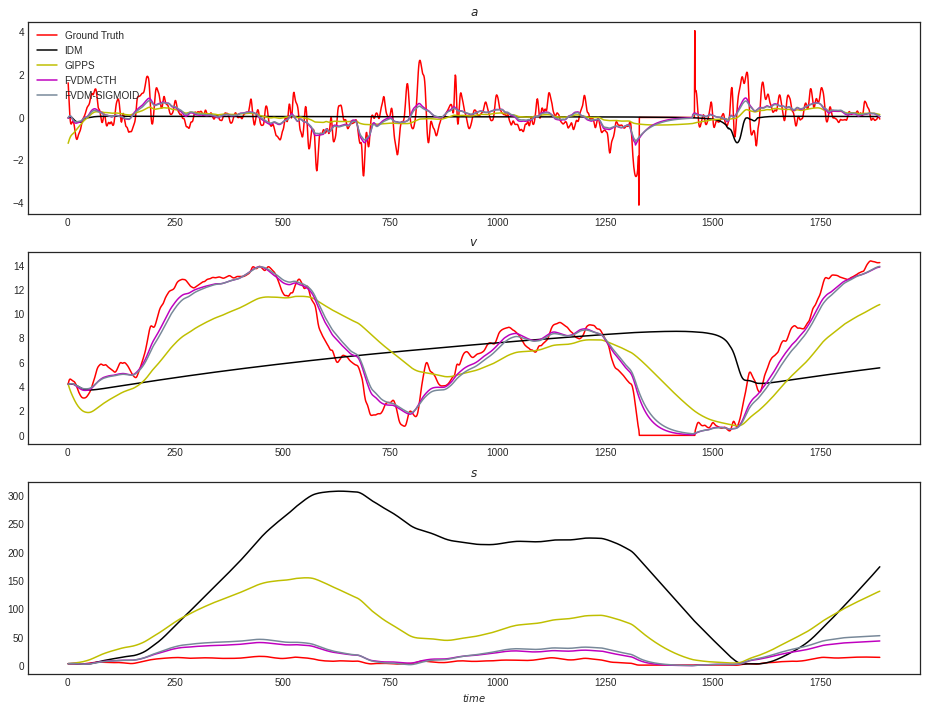

In [8]:
startTrj = 0
endTrj = -1

fig, (ax1, ax2, ax3) = plt.subplots(3) 

fig.set_figheight(12)
fig.set_figwidth(16)

g1, = ax1.plot(tNew[startTrj:endTrj], followRealA_IDM[startTrj:endTrj], "r")
p1, = ax1.plot(tNew[startTrj:endTrj], followPredA_IDM[startTrj:endTrj], "k")
h1, = ax1.plot(tNew[startTrj:endTrj], followPredA_GIPPS[startTrj:endTrj], "y")
y1, = ax1.plot(tNew[startTrj:endTrj], followPredA_CTH[startTrj:endTrj], "m")
r1, = ax1.plot(tNew[startTrj:endTrj], followPredA_SIG[startTrj:endTrj], "lightslategray")
#k1, = ax1.plot(tNew[startTrj:endTrj-1], dv, "g")
ax1.set_title('$a$')
ax2.plot(tNew[startTrj:endTrj], followRealV_IDM[startTrj:endTrj], "r")
ax2.plot(tNew[startTrj:endTrj], followPredV_IDM[startTrj:endTrj], "k")
ax2.plot(tNew[startTrj:endTrj], followPredV_GIPPS[startTrj:endTrj], "y")
ax2.plot(tNew[startTrj:endTrj], followPredV_CTH[startTrj:endTrj], "m")
ax2.plot(tNew[startTrj:endTrj], followPredV_SIG[startTrj:endTrj], "lightslategray")
#ax2.plot(tNew[startTrj:endTrj], newV, "g")
ax2.set_title('$v$')
ax3.plot(tNew[startTrj:endTrj], spaceReal_IDM[startTrj:endTrj], "r")
ax3.plot(tNew[startTrj:endTrj], spacePred_IDM[startTrj:endTrj], "k")
ax3.plot(tNew[startTrj:endTrj], spacePred_GIPPS[startTrj:endTrj], "y")
ax3.plot(tNew[startTrj:endTrj], spacePred_CTH[startTrj:endTrj], "m")
ax3.plot(tNew[startTrj:endTrj], spacePred_SIG[startTrj:endTrj], "lightslategray")
#ax3.plot(tNew[startTrj:endTrj], u_input_sim[:,0], "g")
ax3.set_title('$s$')
ax1.legend((g1, p1, h1 ,y1 ,r1), ('Ground Truth', 'IDM','GIPPS' ,'FVDM-CTH' ,'FVDM-SIGMOID'), loc='upper left', shadow=False)
plt.xlabel("$time$")
plt.savefig('ResearchUpdate#43/comparison/NAPOLI_RMSE(A).png')
plt.show()